# **Exploration 2: Exploration of Primes**


Group 1 Members: Tatiana Godinez, Emet Levy, Perry Winsor, Rowan Nolan, Angelly Aquise

# **Introduction**

The prime numbers are an infinite set of positive integers (as proven by Euclid). However, there are still unsolved questions revolving around such numbers. In this notebook, we will explore some of the questions and conundrums surrounding the evasive prime numbers. 

Questions we will answer start with the number of primes in a range of numbers. We will use two methods to evaluate and analyze this. To understand the behavior of primes in their frequency of appearance and number we will make use of matplotlib and PIL to relate growth in number of primes to the gaps between primes and their sizes. We also evaluate the size of gaps between primes in $\mathbb{Z}/7\mathbb{Z}$.


###Imports

In [ ]:
import numpy as np
import mpmath
import matplotlib.pyplot as plt

# **Prime Counting Function**

The function below demonstrates the prime counting function, $\pi (x)$, which gives us the primes between two large numbers a and b. As mentioned in the introduction we will need this to further explore the realtion with Euler's Prime Function. 

In [ ]:
def Pi(b,a=0):
  '''
  int, int -> int
  Counts primes between a and b with b greater than a.
  '''
  if b <= a:
    raise ValueError('Input in the form (Max, Min)')
  flags = [True] * (b+1)
  flags[0] = False
  flags[1] = False
  flags[4::2] = [False] *((b-2)//2)
  p = 3
  while p<=np.sqrt(b):
    if flags[p]:
      flags[p*p::2*p]= [False] * ((b-p*p)//(2*p)+1)
    p = p + 2
  return flags[a:b+1].count(True)

## **Comparing the Prime Counting Function $\pi(x)$ and Euler's Prime Approximation $Li(x)$.**

First, we define the $Li(x)$ function as:
$$Li(x) = \int_2^x \frac{1}{ln(t)} dt$$


In [ ]:
def Li(x):
  return mpmath.li(x, offset=True) 

Looking at the graph we made ahead of time, we also defined a function 'Cool_Li(x)' and applied it to the array 'cool_li_list', which displays a squishing of the original 'Li(x)' and is visually more accurate.

In [ ]:
def Cool_Li(x):
  return .95*(mpmath.li(x, offset=True))

In [ ]:
xlist = np.arange(1, 1000, 1)
li_list = np.array([Li(x) for x in xlist])
pi_list = np.array([Pi(x) for x in xlist])
cool_li_list = np.array([Cool_Li(x) for x in xlist])

In [ ]:
difference_list = li_list - pi_list

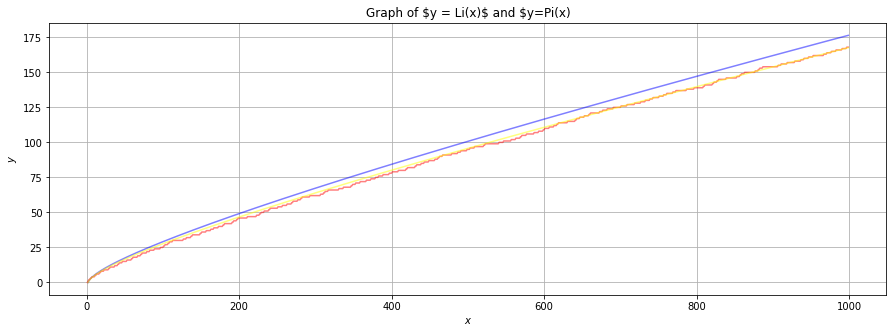

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(xlist, li_list, alpha=0.5, c='blue')
plt.plot(xlist, pi_list, alpha=0.5, c='red')
plt.plot(xlist, cool_li_list, alpha=0.5, c='yellow')
plt.grid() # A grid might help.
plt.xlabel('$x$') # Notice the dollar signs... matplotlib understands basic LaTeX in text!
plt.ylabel('$y$')
plt.title('Graph of $y = Li(x)$ and $y=Pi(x)')
plt.show()

Here, we see that $Li(x)$ is a fairly good approximation for the number of primes up to a given number, even when $x$ varies from 1 to 1000.  However, 'Cool_Li' seems to be doing a nice job.

Graphing the error function of $Li(x) - Pi(x)$, we see that the difference in Li versus the number of primes erratically increases when $x$ ranges from 1 to 1000.

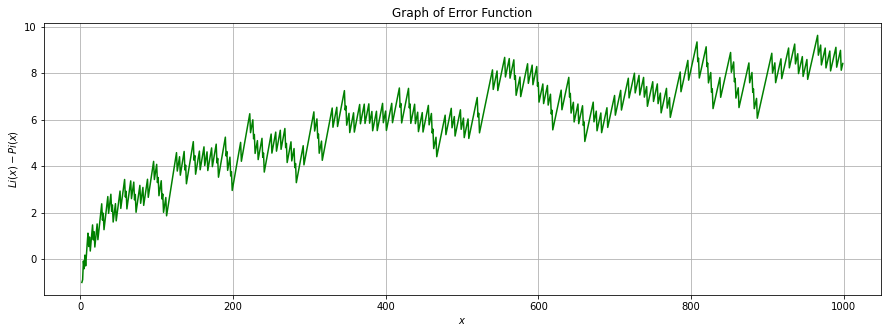

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(xlist, difference_list, alpha=1, c='green')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$Li(x) - Pi(x)$')
plt.title('Graph of Error Function')
plt.show()

In [ ]:
cool_difference_list = cool_li_list - pi_list

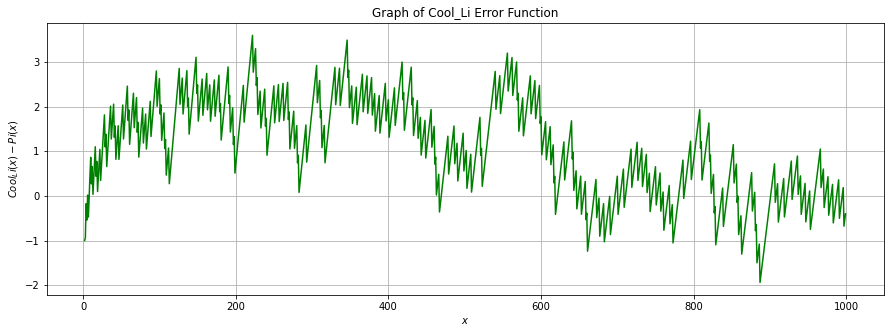

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(xlist, cool_difference_list, alpha=1, c='green')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$Cool_Li(x) - Pi(x)$')
plt.title('Graph of Cool_Li Error Function')
plt.show()

However, when we graph 'Cool_Li(x)' against our $x$ values, the graph, while still erratic, seems to fluctuate somewhere around 0.

### **Setting Up Primes List and Where Function**

In [ ]:
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags

In [ ]:
def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

In [ ]:
primes = where(isprime_list(1000000))

## **Prime Gaps**

Below is a function that describes the length of gaps between prime numbers. Using this function, we were able to explore gaps that are most common between consecutive prime numbers as well as non-consecutive numbers. 

In [ ]:
def prime_gaps(x,i):
  '''
  Inputs: x: length of prime interval, i: gap between primes. 
  Outputs: number of prime gaps of length i in range to x-1
  '''
  L=(np.array(primes[1:x])-np.array(primes[0:x-1]))
  h=0
  for j in L:
    if j==i:
      h+=1
  return h

In [ ]:
prime_gaps(168,6)

44

In [ ]:
#plot the number of interval of prime gaps

def primegap_plot(x,j):
  '''
  Inputs: x: Length of interval of primes, j: gap between primes 
  Outputs: Number of gaps of length j in interval x. 
  '''
  #empty lists to be filled 
  y_values=[] 
  x_values=[]
  for i in range(1,x):
    y_values.append(prime_gaps(i,j)) #appending number of prime gaps of length j from 0 to x 
  x_values=range(0,len(y_values))
  plt.plot(x_values, y_values, label="prime gap length {}".format(j))
  plt.grid(color='black', linewidth=.2)
  plt.title('Prime gaps from 0 to {}' .format(x))
  plt.legend()

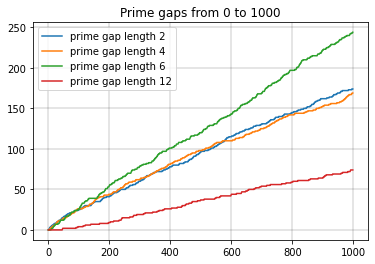

In [ ]:
primegap_plot(1000,2)
primegap_plot(1000,4)
primegap_plot(1000,6)
primegap_plot(1000,12)

####Observations on Prime Gaps 
1. Noticeably, the gap of 6 is the prevalent gap between primes in the range 0 to 1000. 
2. It is curious how linear the trend of prime gaps is for most gap lengths. 
3. It can also be observed from the above plot that smaller prime gaps tend to be more frequent as the range of primes grows larger. The graph shows, however, that prime gaps of 2 are less common than prime gaps of length 6. 

###Looking at primes with Modular Arithmetic 

In [ ]:
 def mod_primes(x,i,f):
  ''' 
  Inputs: x: max value in range of primes, i: value in mod f, f: the modular being used
  Outputs: Number of primes with values i in mod f in the range from 0 to x.
  '''
  mod_f = [p for p in primes if p%f == i and p<x]
  return len(mod_f) 

In [ ]:
def plot_mod_primes(x,i,f): 
  '''
  Inputs: x: max value in range of primes, i: value in mod f, f: the modular being used 
  Outputs: plot of number of primes with values i in mod f in the range from 0 to x. 
  '''
  y_values=[]   #empty list to fill 
  if i>f: #keeps the the input value for i below the mod being used 
    i=i%f
  for j in range(x):
    y_values.append(mod_primes(j,i,f))
  x_values=range(len(y_values))
  #graph formatting
  plt.plot(x_values,y_values,label='{} mod {}'.format(i,f))
  plt.title('primes in mod {}'.format(f))
  plt.legend()

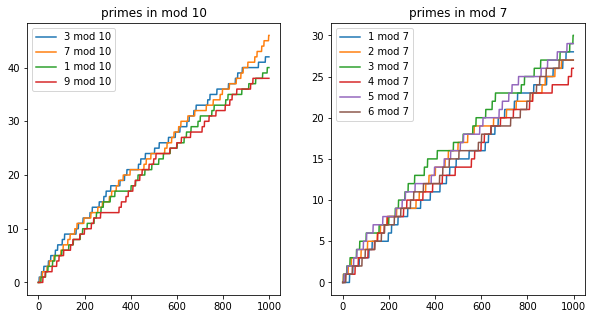

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plot_mod_primes(1000,3,10)
plot_mod_primes(1000,7,10)
plot_mod_primes(1000,1,10)
plot_mod_primes(1000,9,10)

plt.subplot(1, 2, 2)
plot_mod_primes(1000,1,7)
plot_mod_primes(1000,2,7)
plot_mod_primes(1000,3,7)
plot_mod_primes(1000,4,7)
plot_mod_primes(1000,5,7)
plot_mod_primes(1000,6,7)


####Observations on Looking at Primes with Modular Arithmetic 

1. The code that plots primes in different mods runs a bit slow, in large part because it loops through the mod_primes function x many times. There is undoubtly a more streamlined version of this code that we were as of yet unable to write. 


## **PIL Visualization of primes and prime gaps 1-1000**



PIL graph allows to view gaps between prime numbers, compare gaps as the numbers visualized increase and observe patterns in gaps. 

 Starting in the upper left corner, blocks are organized so as to have 50 orange blocks representing a prime number each in each column. The blocks colored orange represent prime numbers and the rest of the blocks represent composite and non prime/non composite numbers. There are a total of 20 columns and 1000 blocks representing 1000 numbers (1-1000).

To distinguish the gaps of various sizes from each other they are colored differently based on the size: 

A gap of 2 betweeh 2 prime numbers is represented by a blue sector. (Such as for 3 and 5) 

A gap of 4 betweeh 2 prime numbers is represented by a red sector. (Such as for 7 and 11) 

A gap of 6 betweeh 2 prime numbers is represented by a yellow sector. (Such as for 23 and 29) 




In [ ]:
def is_prime(n):
    '''
    Checks whether the argument n is a prime number.
    Uses a brute force search for factors between 1 and n.
    '''
    if n==1:
      return False
    else: 
      for j in range(2,n):  # the range of numbers 2,3,...,n-1.
        if n%j == 0:  # is n divisible by j?
          return False
    return True

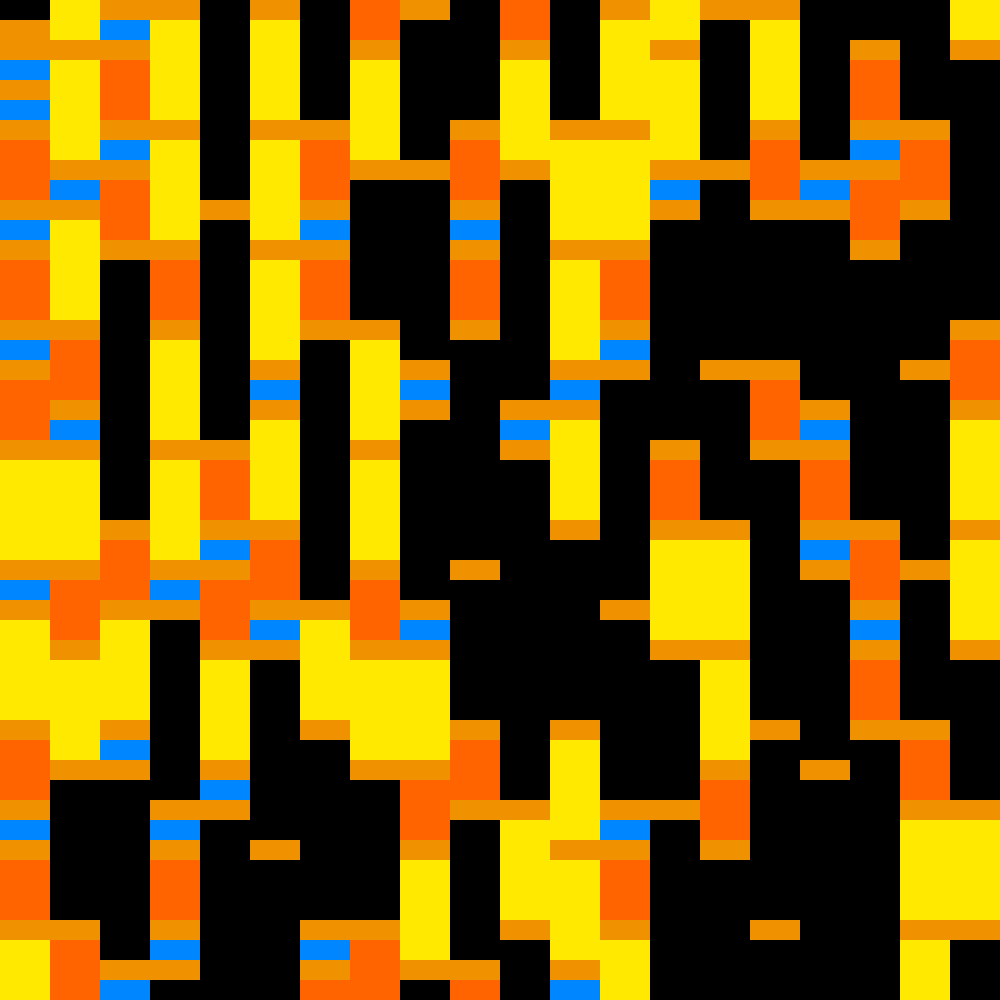

In [ ]:
import numpy as np 
from PIL import Image
solid = np.zeros((1000, 1000,3), dtype=np.uint8)
n=0
column=0
l=[]
s=0
while (n<20):  #loop for primes 
  for x in range(n*50,(n+1)*50):
    m=0
    while (m<50):
      if is_prime(50*s+m+1)==True: #evaluate numbers 1-1000 to check if prime 
        j=len(l)
        l.append(50*s+m+1)  if 50*s+m+1 not in l else l #store in list for later 
        for y in range(m*20,(m+1)*20):
          solid[y,x] = [240,145,0] #make orange blocks for prime numbers 
      m=m+1
  s=s+1
  n=n+1 
n=0 # reset variables for prime gaps 
i=1
l=list(l) 
l.sort()
s=0
while (n<20): #loop for prime gaps 
  for x in range(n*50,(n+1)*50):
    m=0
    while (m<50):
      if (50*s+m+1)in l:
        a=l.index(50*s+m+1)
        if l[a]-l[a-1] ==6: #check if gap == 6 
          for y in range((m-5)*20,(m)*20):  
            if y>=0: 
              solid[y,x] = [255,233,0] #make yellow blocks 
            else: 
              solid[y,x-50] = [255,233,0]
        if l[a]-l[a-1] ==4:  #check if gap == 4 
          for y in range((m-3)*20,(m)*20): 
            if y>=0: 
              solid[y,x] = [255,100,0] #make orange blocks 
            else: 
              solid[y,x-50] = [255,100,0]
        if l[a]-l[a-1] ==2:  #check if gap == 2 
          for y in range((m-1)*20,(m)*20):  
            if y>=0: 
              solid[y,x] = [0,134,255] #make blue blocks 
            else: 
              solid[y,x-50] = [0,134,255]
      m=m+1
  n=n+1 
  s=s+1
img = Image.fromarray(solid) # Create an image from the array.
display(img)

# **Conclusion**

The prime numbers and the related graphs have very interesitng behaviors, both visually and analytically. To analyze the behavior of primes, we juxtaposed a plot of Euler's Prime Approximation, $Li(x)$, and the prime counting function, $\pi(x)$, to evaluate the accuracy of $Li(x)$. The error function evaluates and illustrates the difference at each result value of the evaluated function over a range of numbers 1-1000.  Using matplotlib, it was easy to that the error when comparting the traditioinal $Li(x)$ and $\pi(x)$ was minimal, but still followed a pattern of growing over time.  By being able to visualize the two functions, we realized that by means of adding a fractional multiplier to $Li(x)$, we could flatten the function just enough to make it fit the actual prime count line a little better.  The 'cool_li' error graph ended up giving an interesting set of outputs, still erratic, but that floated around 0.  In the future, we would be curious to see what a trigonometric regression on that error output would look like.

Inclusion of prime gaps was done for analysis of prime numbers. While the ratio of prime gaps to one another are not 1:1 (based on plot) as the numbers evaluated increases. They 

The PIL visualization serves to further illustrate the linear growth of primes and find patterns within prime numbers.
